In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
train = pd.read_csv('./datasets/train.csv')

# <span style = 'color: red'> Notes Link </span>

https://docs.google.com/document/d/1xPUCgfMSbSYalZLlZeWmvHozMZ_xW75ZrgJ353WpIK0/edit?usp=sharing

# <span style = 'color: blue' > Cleaning </span>

**Viewing the DataFrame**

## <span style = 'color:red'> Warning this needs to be changed for the next project: </span>

Uncomment the code in the bottom of the cell

In [3]:
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_columns', 20)

In [4]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
train.shape

(2051, 81)

## Reformatting Columns and Column Names##

**Creating `train_cols` Variable with all the Dataframe Columns:**

In [6]:
train_cols = train.columns

**Reformatting Column Names:**

In [7]:
train.columns = [names.lower().replace(" ", "_") for names in train_cols]
# train 

**Renaming column `totrms_abvgrd` to `tot_rooms_abvgrd` for preference:**

In [8]:
train.rename(columns = {'totrms_abvgrd': 'tot_rooms_abvgrd'}, inplace = True)

**Updating the `train_cols` variable:**

In [9]:
train_cols = train.columns

**Checking the Null Values of each Column. Those not in View have 0 nulls:**

In [10]:
# train.isnull().sum().sort_values(ascending = False).head(30)

**Removing Houses With Square Footage over 4,000 as Recommended in the Data Dictionary:**

In [11]:
train = train[train['gr_liv_area'] < 4000]
train.shape

(2049, 81)

**Addressing A Typo:** In the above chart we can see there was a value where the garage was built in "2207", which of course is impossible. Sense we know the data if from years 2006-2010, and it'll have little statistical affect if we do it this way, we'll assume it was meant to be 2007.

In [12]:
train[train["garage_yr_blt"] > 2020]["garage_yr_blt"] #Viewing where the location of the typo's cell is
train.at[1699, "garage_yr_blt"] = float(2007) #Changing the cell to assumed correct value. Changing to a float because the rest of the values in the column are float. 

**Assigning Numerical Value to Ordinal Values in Catergorical Columns:**

Excellent(Ex) : 5 

Average/Average (TA) : 4 

Good (Gd) : 3 

Fair (Fa) : 2

Poor (Po) : 1

In [13]:
quality_numbers = { 'Ex' : 5 , 'TA' : 4 , 'Gd' : 3 , 'Fa': 2 , 'Po': 1}
train.replace ({
    'Heating QC': quality_numbers, 
    'Pool QC': quality_numbers, 
    'Garage Cond': quality_numbers, 
    'Garage Qual': quality_numbers, 
    'FireplaceQu': quality_numbers, 
    'KitchenQual': quality_numbers, 
    'Bsmt Cond' : quality_numbers, 
    'Bsmt Qual': quality_numbers, 
    'Exter Cond': quality_numbers, 
    'Exter Qual' : quality_numbers
}, inplace=True)

**Creating a Numerical Columns Variable Called `num_cols`:**

In [14]:
num_cols = train._get_numeric_data()

**Creating a Catergorial Columns List Called `cat_cols`:**

In [15]:
#Code adapted from GeeksforGeeks.org          https://www.geeksforgeeks.org/python-difference-two-lists/

def get_difference(lst_1, lst_2): 
    dif = (list(set(lst_1) - set(lst_2)))  #Subtracting the numerical cols from all the cols using sets
    return dif
                 
cat_cols = get_difference(train_cols, num_cols)
# cat_cols

# <span style = "color:blue" > EDA </span>

---
---
---

**Viewing the Years this Dataset was Taken From**

In [16]:
print("years of houses sold in data:")
print(train['yr_sold'].unique())

years of houses sold in data:
[2010 2009 2006 2007 2008]


**Defining a Function that Prints the Columns by Simalities**

In [17]:
prefixes =["bsmt", "gar", "pool", "exter", "sale", "sold", "bath", "area", "qu", "cond", 'por', 'lot', "roof", "room", "abvgr", "sf"]

def group_prefixes(cols_list, prefix_list):
    grouped = []

    for prefixes in prefix_list:
        for columns in cols_list:
            if prefixes in columns:
                print(columns)
                grouped.append(columns)  
                
        print("___")
        
    diff = get_difference(cols_list, grouped)
    
    print("Number of columns not grouped:", len(diff))
    print("Columns that are NOT grouped:")
    print("___")
    
    print(diff)

**Viewing Similarities for All the Columns**

In [18]:
# group_prefixes(train_cols, prefixes)

## <span style = 'color: red'> Option 1) </span>
**Plotting Correlation Between Numerical Columns and `saleprice`**

In [19]:

# plt.figure()

# for columns in num_cols:
    
    
#     sns.regplot(x=columns, y="saleprice", data=train);
#     plt.title(f"Correlation Between Sale Price and {columns}", fontsize =20)
#     plt.show()
 


## <span style = 'color:red'> Optoin 2 </span>  

**Plotting Correlation Between Numerical Columns and `saleprice`**

In [67]:
#This needs a little editing to work, but it would view the plots more succinctly

# sns.pairplot(train, y_vars=['saleprice'], x_vars=[num_cols]);

**Plotting `num_cols` to Detect Ouliers:**

In [20]:
# for columns in num_cols:
#     sns.boxplot(x=train[columns]);
#     plt.title(columns, fontsize = 20);
#     plt.show()

## <span style = 'color:red'> **If the half baths equals 0 or 1 I can just make a column of total baths, sense it doesn't idk what to do** </span>

In [21]:
train['half_bath'].unique()

array([1, 0, 2])

**Number of Houses Sold Per Year:**

Number of houses sold:


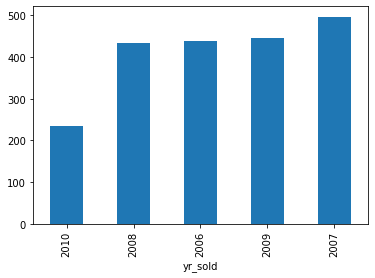

In [22]:
print("Number of houses sold:")
train.groupby('yr_sold')['id'].count().sort_values().plot(kind ='bar');

**Correlation Between Lot Size and Price Excluding Outliers Above 6,000 sq. ft.**

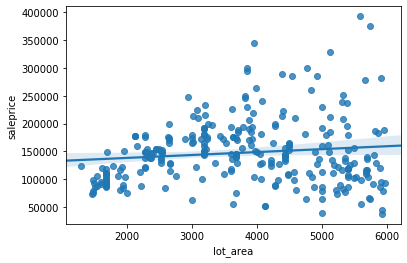

In [23]:
sm_lot = train[train['lot_area'] < 6000][['lot_area', 'saleprice']]

sns.regplot(x='lot_area', y="saleprice", data=sm_lot);
# 
# sm_lot
# train[train['Lot Area'] < 6000].plot()

**Correlation Between Number of Car Garage and Garage Area (sq. ft)**

-We can resonably get rid of of of the columns because they're redundant

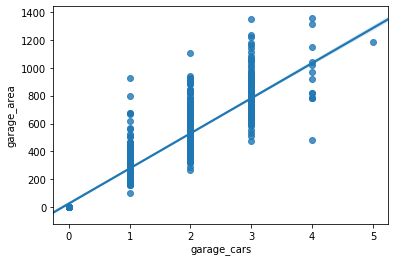

In [24]:
sns.regplot(x='garage_cars', y="garage_area", data=train);

**Loop plotting bar graphs of catergorical columns and how often each element shows up in the data**

In [25]:
# for cols in cat_cols:
#     train.groupby(cols)[cols].count().sort_values().plot(kind ='bar');
#     plt.show()

**Viewing How Many Homes are not `1fam` (single family homes)**

In [26]:
train[train['bldg_type'] != '1fam']['bldg_type'].count()

# sns.regplot(x='Bldg Type', y='SalePrice', data=no_1fam);

# no_1fam.count()

# train.groupby(cols)[cols].count().sort_values().plot(kind ='bar');


2049

**Viewing Columns Correlation to Saleprice:**

In [27]:
#Code adapted from classmate Pete Plass

train_corr = train.corr()
train_corr[['saleprice']].sort_values("saleprice", ascending=True)


,saleprice
pid,-0.255068
enclosed_porch,-0.135713
kitchen_abvgr,-0.125472
overall_cond,-0.097093
ms_subclass,-0.087331
id,-0.051416
bsmt_half_bath,-0.045571
low_qual_fin_sf,-0.041608
yr_sold,-0.015174
misc_val,-0.010323


**Creating a List with Columns that Seem to Have Little Impact on Sale Price Called `insig_cols`:**

In [28]:
insig_cols = [
'pid',
'enclosed_porch',
'kitchen_abvgr',
'overall_cond',
'ms_subclass',
'id',
'bsmt_half_bath',
'low_qual_fin_sf',
'yr_sold',
'misc_val',
# 'bsmtfin_sf',
'pool_area',
'mo_sold',
# 'ssn_porch',
'bsmt_cond',
'screen_porch',
'bedroom_abvgr',
'garage_cond',
'garage_qual',
'exter_cond',
'bsmt_qual',
'bsmt_unf_sf',
]

train.drop(columns = insig_cols, inplace = True);  #Dropping the columns from the insignifanct columns list (less than .2 corr)

**Correlation between saleprice and numerical columns**

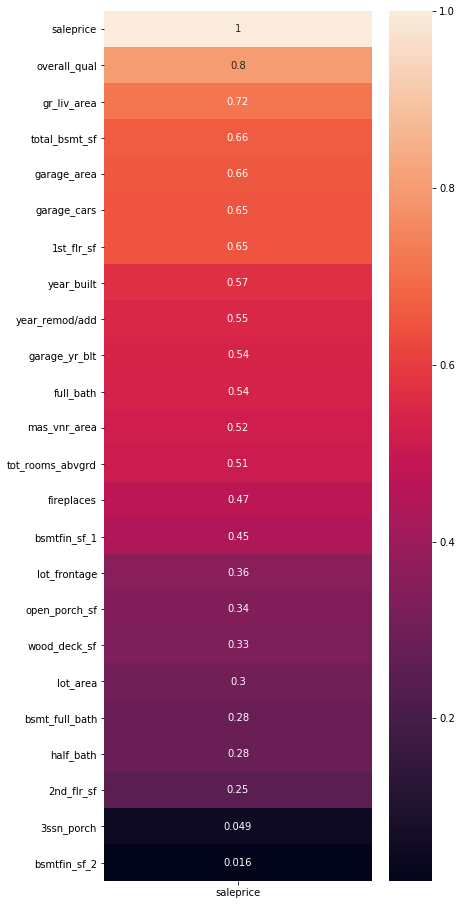

In [29]:
price_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending = False)


plt.figure(figsize= (6,16))
sns.heatmap(price_corr, annot=True);

**Average Sale Price Per Neighborhood**

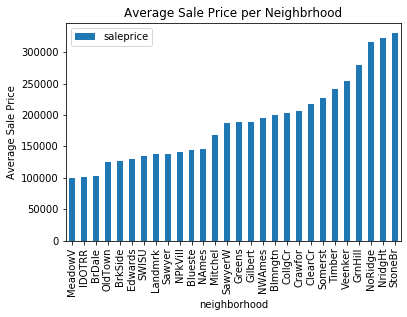

In [30]:
train.groupby('neighborhood')['neighborhood', 'saleprice'].mean().sort_values('saleprice').plot(kind ='bar');

plt.ylabel('Average Sale Price');
plt.title('Average Sale Price per Neighbrhood');

**Creating a Variable with Columns that Seem to Have a High Correlation to Sale Price called `sig_cols`:**

In [41]:
# sig_cols = train[['overall_qual', 'gr_liv_area', 'total_bsmt_sf', 'garage_area', 'garage_cars', '1st_flr_sf', 'year_built', 'full_bath', 'tot_rooms_abvgrd']]

In [ ]:
Sig_cols_w_nulls + ['garage_cars', 'garage_area', 'total_bsmt_sf']

In [42]:
sig_cols = train[['overall_qual', 'gr_liv_area', '1st_flr_sf', 'year_built', 'full_bath', 'tot_rooms_abvgrd']]

In [43]:
sig_cols.isnull().sum()

overall_qual        0
gr_liv_area         0
1st_flr_sf          0
year_built          0
full_bath           0
tot_rooms_abvgrd    0
dtype: int64

# <span style = 'color:blue'> Modeling </span> 

--- 
---

In [44]:
X = sig_cols
features = list(X.columns)
y = train['saleprice']

**Train/Test/Split**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Instantiating the Model:**

In [46]:
lr = LinearRegression()

### <span style = 'color: red'> What does `lr.coef_` do/mean in reality? </span>

In [69]:
lr.coef_

array([18957.53173025,    77.06917979,    42.84766434,   509.55390437,
       -9815.60559855, -4438.37434867])

### <span style = 'color: red'> What does `lr.intercept_` do/mean in reality? </span>

In [70]:
lr.intercept_

-1059784.121899646

**Getting the Average R2 Score for the Cross Valdition of `X_test` and `y_test` Model:**

In [47]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

# cross_val_score(lr, X_train, y_train, cv=5).mean() #R2 score 

0.8057854891366674

 **Fitting the Model to `X_test` and `y_test`:**

In [49]:
lr.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Getting the R2 Scores for `X_test` and `y_test` Model:**

In [52]:
lr.score(X_test, y_test)

0.8163362495250844

**Getting the R2 Scores for `X_train` and `y_train` Model:**

In [54]:
lr.score(X_train, y_train)

0.8034684561566008

**Predictions:**

In [56]:
predictions = lr.predict(X_test)

### <span style = 'color:red'> What does this mean in reality? </span>

? Does it mean that our model, on average, is $32,606 off from predicting saleprices?

In [59]:
np.sqrt(mean_squared_error(y_test, predictions))

32606.9545038977

In [60]:
r2_score(y_test, predictions)

0.8163362495250845